In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
from TargetDistributions.DoubleWell import ManyWellEnergy
import torch
from FittedModels.utils.plotting_utils import plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.train import LearntDistributionManager
from Utils.numerical_utils import quadratic_function as expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import matplotlib.pyplot as plt
from FittedModels.utils.plotting_utils import plot_samples_vs_contours_many_well
torch.set_default_dtype(torch.float64)

In [3]:
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours_many_well(*args, **kwargs)
    plt.show()

In [4]:
target = ManyWellEnergy(a=-0.5, b=-6)

# kl divergence

In [5]:
torch.manual_seed(1)
# ******************* Parameters *******************
dim = 4
epochs = int(2e4)
n_samples_estimation = int(1e5)
batch_size = int(1e3)
lr = 2e-5
weight_decay = 1e-6
clip_grad_norm = False
optimizer = "Adam"
flow_type = "RealNVP"
loss_type = "kl"
initial_flow_scaling = 1.5
n_flow_steps = 64
annealing = True
n_plots = 5
flow_kwargs = {"use_exp": False}

In [6]:
torch.manual_seed(0)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type, **flow_kwargs)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing, weight_decay=weight_decay)

In [7]:
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(info_before["effective_sample_size"]/n_samples_estimation)

tensor(0.0128)


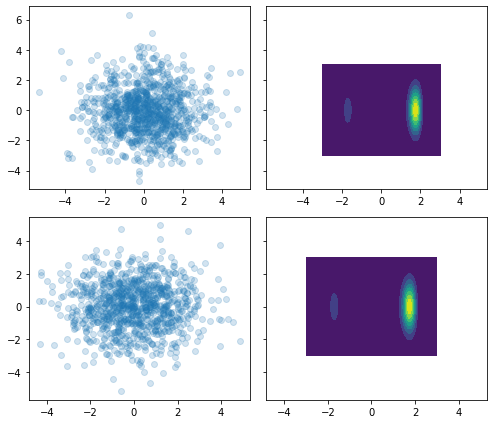

In [8]:
plotter(tester)

loss: -7.332091983955913, mean log p_x -7.536857279381536:   0%|          | 0/20000 [00:00<?, ?it/s]

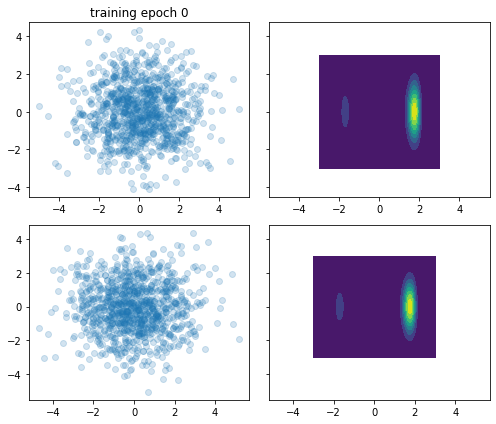

loss: -10.258793429554608, mean log p_x 12.621105973120612:  20%|██        | 4000/20000 [10:04<40:01,  6.66it/s]  

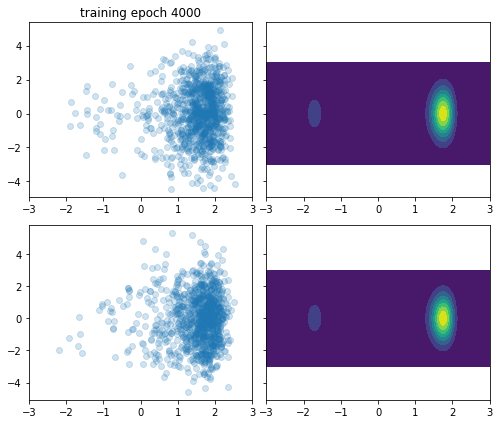

loss: -10.258793429554608, mean log p_x 12.621105973120612:  20%|██        | 4002/20000 [10:05<1:12:36,  3.67it/s]

ESS is 0.017717134632076394


loss: -16.772479868106622, mean log p_x 17.078086294436776:  40%|████      | 8000/20000 [19:30<25:13,  7.93it/s]  

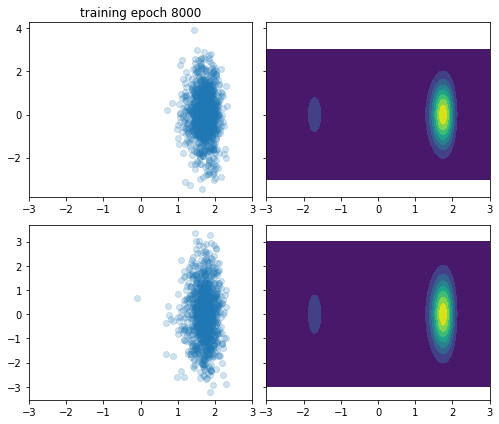

loss: -16.772479868106622, mean log p_x 17.078086294436776:  40%|████      | 8002/20000 [19:31<51:01,  3.92it/s]  

ESS is 0.11384288861485294


loss: -20.245271502387304, mean log p_x 17.71451170039954:  60%|██████    | 12000/20000 [28:46<30:31,  4.37it/s] 

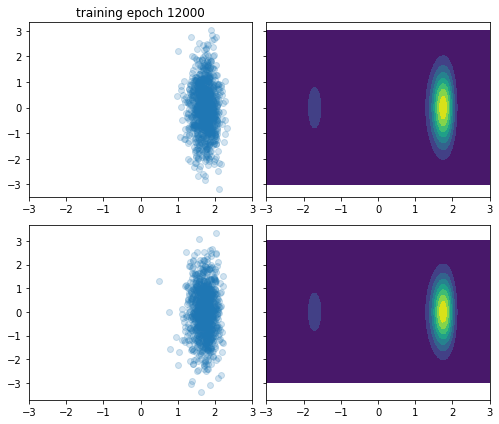

loss: -20.245271502387304, mean log p_x 17.71451170039954:  60%|██████    | 12001/20000 [28:47<1:01:23,  2.17it/s]

ESS is 0.39682177877303765


loss: -20.247879680769817, mean log p_x 17.632682426510836:  80%|████████  | 16000/20000 [37:46<10:42,  6.22it/s] 

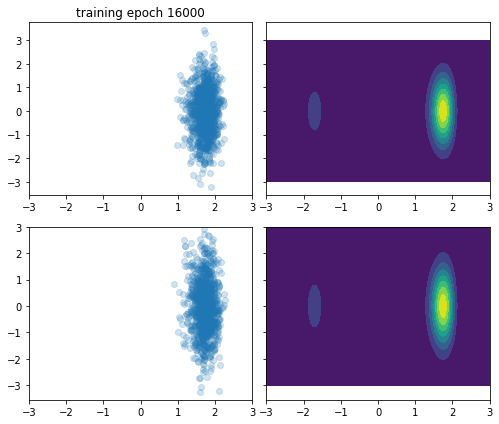

loss: -20.247879680769817, mean log p_x 17.632682426510836:  80%|████████  | 16002/20000 [37:47<20:09,  3.30it/s]

ESS is 0.54480682963762


loss: -20.2459661423967, mean log p_x 17.66404795599814: 100%|██████████| 20000/20000 [48:10<00:00,  6.92it/s]   


In [9]:
history = tester.train(20000, batch_size=batch_size, clip_grad_norm=clip_grad_norm, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)

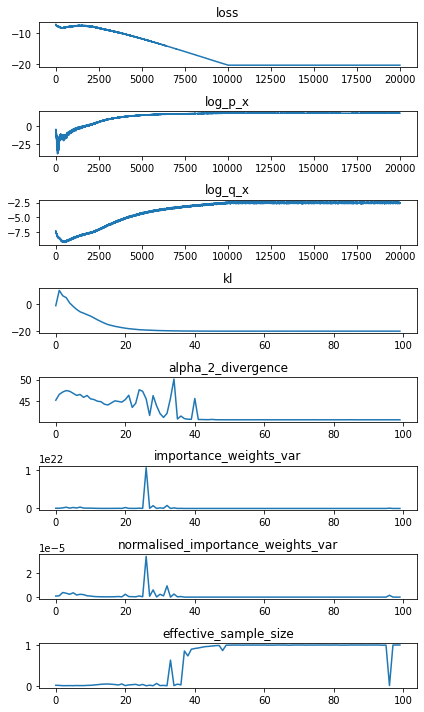

In [10]:
plot_history(history)

In [11]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

estimate before training is 23.44797813943399 
estimate after training is 25.05248744541567 
effective sample size before is 0.012831623814753843
effective sample size after train is 0.9937035507306795
variance in weights is 6.336409112972776e-13
